In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

def select_svd_components(X, target_variance=0.98, max_components=300, plot=True):
    # Ограничим количество компонент, чтобы избежать избыточных вычислений
    n_features = min(X.shape[0], X.shape[1], max_components)
    
    svd = TruncatedSVD(n_components=n_features, random_state=42)
    svd.fit(X)
    
    cum_variance = np.cumsum(svd.explained_variance_ratio_)
    
    # Найдём минимальное количество компонент, чтобы достичь целевой дисперсии
    optimal_components = np.argmax(cum_variance >= target_variance) + 1
    
    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(np.arange(1, n_features + 1), cum_variance, marker='o', label='Накопленная дисперсия')
        plt.axhline(y=target_variance, color='r', linestyle='--', label=f'{int(target_variance*100)}% дисперсии')
        plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'Оптимально: {optimal_components} компонент')
        plt.xlabel("Число компонент")
        plt.ylabel("Накопленная доля дисперсии")
        plt.title("Выбор числа компонент для Truncated SVD")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return optimal_components
def prepare_data(ds):
    ds = ds.dropna(axis = 1)
    
    first_col = ds.iloc[:, 0].tolist()
    data = {}
    for a,elem in enumerate(first_col):
        data[elem] = ds.iloc[a, 1:].tolist() 
    df = pd.DataFrame(data)
    if len(columns_filter) > 0:
        df = df[columns_filter]
    return df * 100

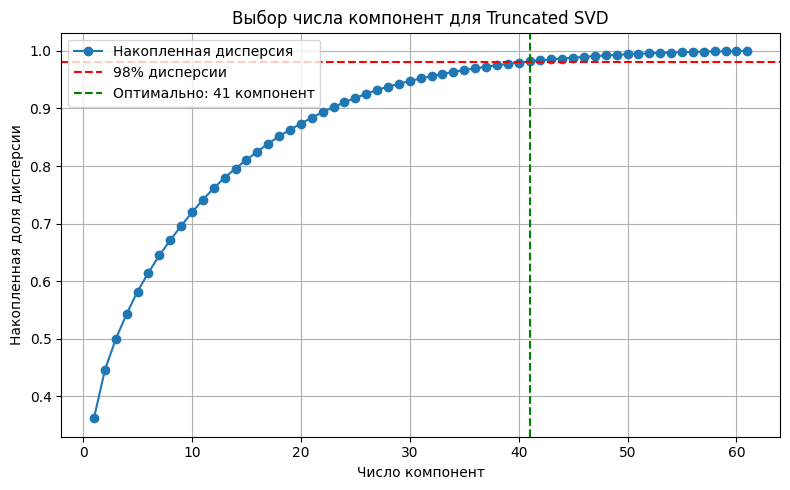

np.int64(41)

In [4]:
file_name = 'cancer-testicular.xlsx'
show_images = True

# data_prepare
columns_filter = ['MAGEA6', 'PAGE5','MAGEA11','XAGE1D','MAGEA12','MAGEA10','MAGEC1' # two nodes and dist
,'MAGEC2', 'CTAG2', 'MAGEA3', 'MAGEA2', 'CSAG2','CSAG1','CTNNA2', 'DSCR8',
 'CCDC36', 'HORMAD1', 'CEP290', 'DDX43','LY6K', 'TAF7L', 'FATE1', 'TIGIT', 'CMKLR1', 'OIP5',
'PBK', 'IGSF11', 'MPHOSPH10', 'CEP55', 'NR6A1', 'SPEF2', 'TEX14', 'ODF2', 'EFEMP1', 'CTAGE1', 
'CTAGE5', 'CASC5', 'POTEE', 'TTK', 'NAGLU', 'HSPA4L', 'ACRBP', 'ZNF165', 'SPAG8', 'SPAG9', 'SPAG1',
'GPAT2', 'CTCFL', 'CCDC62', 'KIAA0100', 'TSGA10', 'TSSK6', 'AKAP3', 'ATAD2B', 'HSPB9', 'PIWIL2',
'CABYR', 'SPAG4', 'SPA17', 'TDRD6', 'ELOVL4']
# Считываем и предобрабатываем данные
ds = pd.read_excel(file_name)
df = prepare_data(ds)
select_svd_components(df)